In [2]:
import os
os.listdir("./")

['.ipynb_checkpoints',
 '02a_LAB_Transforming_Target.ipynb',
 '02a_LAB_Transforming_Target.zip',
 '02b_LAB_Training and Test Splits Demo.ipynb',
 '02c_DEMO_Cross_Validation.ipynb',
 '02d_DEMO_Regularization_and_Gradient Descent.ipynb',
 '02e_LAB_Regularization.ipynb',
 'Ames_Housing_Sales.csv',
 'helper.py',
 'LinearRegression Assignment.docx',
 'LinearRegression Assignment.ipynb',
 '__pycache__']

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
file='Ames_Housing_Sales.csv'
data=pd.read_csv(file)
data.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,...,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold,SalePrice
0,856.0,854.0,0.0,None,3,1Fam,TA,No,706.0,0.0,...,0.0,Pave,8,856.0,AllPub,0.0,2003,2003,2008,208500.0
1,1262.0,0.0,0.0,None,3,1Fam,TA,Gd,978.0,0.0,...,0.0,Pave,6,1262.0,AllPub,298.0,1976,1976,2007,181500.0
2,920.0,866.0,0.0,None,3,1Fam,TA,Mn,486.0,0.0,...,0.0,Pave,6,920.0,AllPub,0.0,2001,2002,2008,223500.0
3,961.0,756.0,0.0,None,3,1Fam,Gd,No,216.0,0.0,...,0.0,Pave,7,756.0,AllPub,0.0,1915,1970,2006,140000.0
4,1145.0,1053.0,0.0,None,4,1Fam,TA,Av,655.0,0.0,...,0.0,Pave,9,1145.0,AllPub,192.0,2000,2000,2008,250000.0


In [5]:
data.shape

(1379, 80)

In [6]:
data_cols=data.columns.tolist()

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1379 entries, 0 to 1378
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   1stFlrSF       1379 non-null   float64
 1   2ndFlrSF       1379 non-null   float64
 2   3SsnPorch      1379 non-null   float64
 3   Alley          1379 non-null   object 
 4   BedroomAbvGr   1379 non-null   int64  
 5   BldgType       1379 non-null   object 
 6   BsmtCond       1379 non-null   object 
 7   BsmtExposure   1379 non-null   object 
 8   BsmtFinSF1     1379 non-null   float64
 9   BsmtFinSF2     1379 non-null   float64
 10  BsmtFinType1   1379 non-null   object 
 11  BsmtFinType2   1379 non-null   object 
 12  BsmtFullBath   1379 non-null   int64  
 13  BsmtHalfBath   1379 non-null   int64  
 14  BsmtQual       1379 non-null   object 
 15  BsmtUnfSF      1379 non-null   float64
 16  CentralAir     1379 non-null   object 
 17  Condition1     1379 non-null   object 
 18  Conditio

In [8]:
unique_values={}
for row in range(len(data_cols)):
    if data[data.columns[row]].nunique() == 1379:
        unique_values[data.columns[row]]=data[data.columns[row]].nunique()
    
unique_values={}

In [9]:
mask = data.dtypes == np.object
categorical_cols = data.columns[mask]
num_ohc_cols = (data[categorical_cols]
                .apply(lambda x: x.nunique())
                .sort_values(ascending=False))
len(num_ohc_cols)

43

In [10]:
small_num_ohc_cols = num_ohc_cols.loc[num_ohc_cols>1]
small_num_ohc_cols -= 1
small_num_ohc_cols.sum()

215

In [11]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
data_ohc=data.copy()

In [12]:
le=LabelEncoder()
ohc=OneHotEncoder(drop='first')
for col in num_ohc_cols.index:
    dat=le.fit_transform(data_ohc[col]).astype(np.int)
    data_ohc=data_ohc.drop(col, axis=1)
    new_dat=ohc.fit_transform(dat.reshape(-1,1))
    n_cols=new_dat.shape[1]
    col_names=['_'.join([col,str(x)])for x in range (n_cols)]
    new_df=pd.DataFrame(new_dat.toarray(),
                       index=data_ohc.index,
                       columns=col_names)
    
    data_ohc=pd.concat([data_ohc, new_df], axis=1)

data_ohc

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,EnclosedPorch,...,Alley_1,GarageFinish_0,GarageFinish_1,LandSlope_0,LandSlope_1,PavedDrive_0,PavedDrive_1,CentralAir_0,Street_0,Utilities_0
0,856.0,854.0,0.0,3,706.0,0.0,1,0,150.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0
1,1262.0,0.0,0.0,3,978.0,0.0,0,1,284.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0
2,920.0,866.0,0.0,3,486.0,0.0,1,0,434.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0
3,961.0,756.0,0.0,3,216.0,0.0,1,0,540.0,272.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0
4,1145.0,1053.0,0.0,4,655.0,0.0,1,0,490.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1374,953.0,694.0,0.0,3,0.0,0.0,0,0,953.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0
1375,2073.0,0.0,0.0,3,790.0,163.0,1,0,589.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0
1376,1188.0,1152.0,0.0,4,275.0,0.0,0,0,877.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0
1377,1078.0,0.0,0.0,2,49.0,1029.0,1,0,0.0,112.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0


In [13]:
mask_float = data.dtypes == np.float
categorical_cols_float = data.columns[mask_float]
categorical_cols_float

Index(['1stFlrSF', '2ndFlrSF', '3SsnPorch', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'EnclosedPorch', 'GarageArea', 'GarageYrBlt', 'GrLivArea',
       'LotArea', 'LotFrontage', 'LowQualFinSF', 'MasVnrArea', 'MiscVal',
       'OpenPorchSF', 'PoolArea', 'ScreenPorch', 'TotalBsmtSF', 'WoodDeckSF',
       'SalePrice'],
      dtype='object')

In [14]:
from sklearn.model_selection import train_test_split
# Extract the X- and Y- data from the dataframe 
X_data = data_ohc.drop('SalePrice', axis=1)
Y_data = data_ohc['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(X_data, Y_data, 
                                                    test_size=0.3, random_state=42)
X_train.shape

(965, 251)

In [15]:
X_train.columns

Index(['1stFlrSF', '2ndFlrSF', '3SsnPorch', 'BedroomAbvGr', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtFullBath', 'BsmtHalfBath', 'BsmtUnfSF',
       'EnclosedPorch',
       ...
       'Alley_1', 'GarageFinish_0', 'GarageFinish_1', 'LandSlope_0',
       'LandSlope_1', 'PavedDrive_0', 'PavedDrive_1', 'CentralAir_0',
       'Street_0', 'Utilities_0'],
      dtype='object', length=251)

In [19]:
#check for skew values
# categorical_cols_float=categorical_cols_float.drop('SalePrice')
skew_limit = 0.75
skew_vals = X_train[categorical_cols_float].skew()

skew_cols = (skew_vals
             .sort_values(ascending=False)
             .to_frame()
             .rename(columns={0:'Skew'})
             .query('abs(Skew) > {0}'.format(skew_limit)))

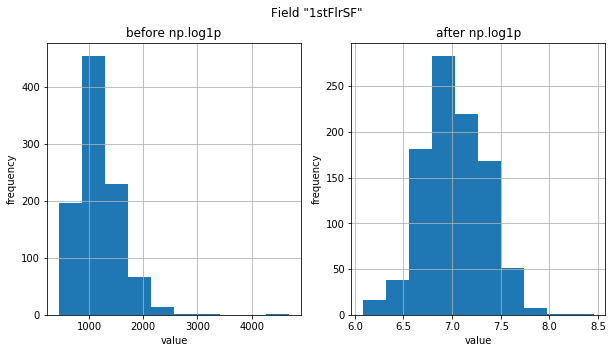

In [20]:
field = "1stFlrSF"
fig, (ax_before, ax_after) = plt.subplots(1, 2, figsize=(10, 5)) #1 row, 2 columns
X_train[field].hist(ax=ax_before)
X_train[field].apply(np.log1p).hist(ax=ax_after)
ax_before.set(title='before np.log1p', ylabel='frequency', xlabel='value')
ax_after.set(title='after np.log1p', ylabel='frequency', xlabel='value')
fig.suptitle('Field "{}"'.format(field));

In [21]:
# Mute the setting wtih a copy warnings
pd.options.mode.chained_assignment = None

#log transform both X test and train set
for col in skew_cols.index.tolist():
    X_train[col] = np.log1p(X_train[col])
    X_test[col]  = X_test[col].apply(np.log1p)  # same thing

[Text(0, 0.5, 'Actual Sale Price'),
 Text(0.5, 0, 'Predicted Sale Price'),
 Text(0.5, 1.0, 'Linear Regression')]

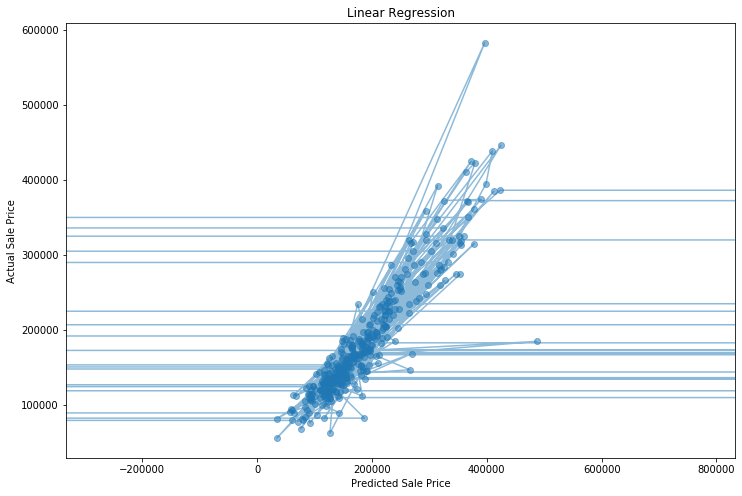

In [23]:
#Linear Regression
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

def rmse (ytrue, ypredicted):
    return np.sqrt(mean_squared_error(ytrue,ypredicted))

lr = LinearRegression()
s = StandardScaler()

X_train_ss=s.fit_transform(X_train)
lr.fit(X_train_ss, y_train)
X_test_ss = s.transform(X_test) #test set only transform, no need fit_transform
y_pred_lr = lr.predict(X_test_ss)

linear_rmse = rmse(y_test, y_pred_lr)

plt.figure(figsize=(12,8))
plt.plot(y_pred_lr, y_test, marker='o', alpha=.5)
plt.xlim((-np.median(y_pred_lr)*2, np.median(y_pred_lr)*5))
ax = plt.gca()
ax.set(xlabel='Predicted Sale Price', ylabel='Actual Sale Price', title='Linear Regression')

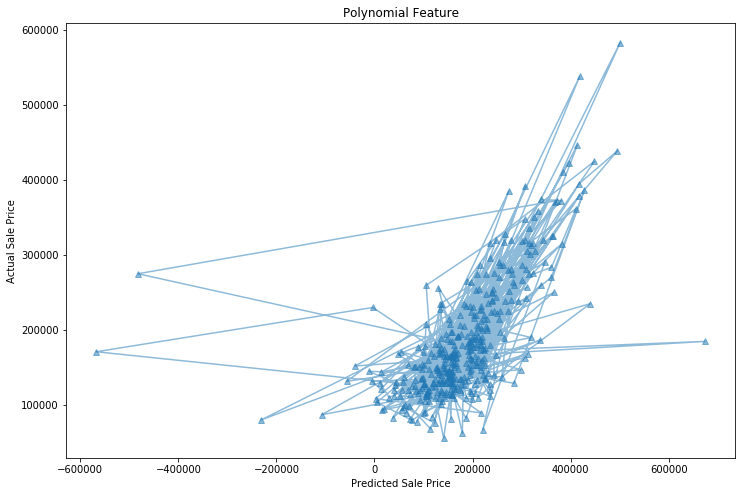

In [24]:
# Setup the polynomial features
degree = 2
pf = PolynomialFeatures(degree)
lr2 = LinearRegression()

# Create the features and fit the model
X_train_poly = pf.fit_transform(X_train)
lr2 = lr2.fit(X_train_poly, y_train)
X_test_poly = pf.transform(X_test)
Y_pred_pf = lr2.predict(X_test_poly)

poly_rmse = rmse(y_test, Y_pred_pf)

# Plot the result
plt.figure(figsize=(12,8))
plt.plot(Y_pred_pf, y_test, marker='^', alpha=.5)
ax = plt.gca()
ax.set(xlabel='Predicted Sale Price', ylabel='Actual Sale Price', title='Polynomial Feature');


10.0 32040.433237817088


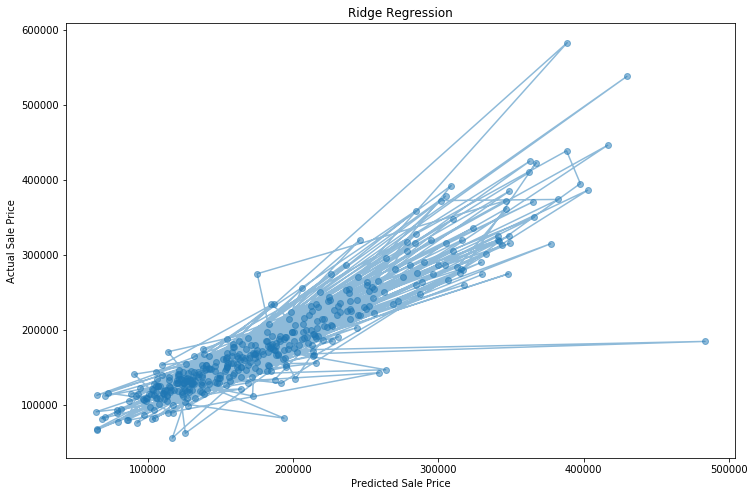

In [25]:
#Ridge regression
from sklearn.linear_model import RidgeCV


alphas = [0.005, 0.05, 0.1, 0.3, 1, 3, 5, 10, 15, 30, 80]

rr = RidgeCV(alphas = alphas,
            cv=4)
rr = rr.fit(X_train, y_train)
y_pred_rr = rr.predict(X_test)

ridge_rmse = rmse(y_test, y_pred_rr)
# print(rr.alpha_, ridgeCV_rmse)

plt.figure(figsize=(12,8))
plt.plot(y_pred_rr, y_test, marker='o', alpha=.5)
ax = plt.gca()
ax.set(xlabel='Predicted Sale Price', ylabel='Actual Sale Price', title='Ridge Regression');
print(rr.alpha_, ridge_rmse)

C:\Users\Wei En\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 91963518044.89458, tolerance: 387053725.58786315
  tol, rng, random, positive)
C:\Users\Wei En\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 91962452521.7276, tolerance: 387053725.58786315
  tol, rng, random, positive)
C:\Users\Wei En\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 91962379302.43008, tolerance: 387053725.58786315
  tol, rng, random, positive)
C:\Users\Wei En\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. Yo

0.0005 40730.75956165211


C:\Users\Wei En\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 200736043076.6591, tolerance: 610299085.7005944
  positive)


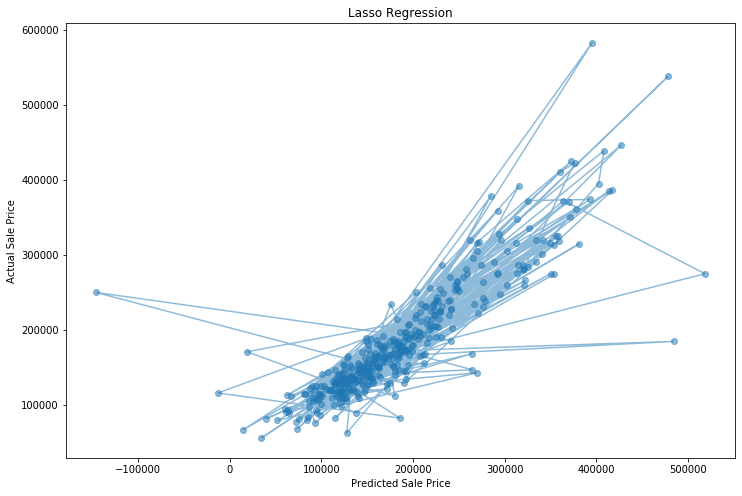

In [27]:
#Lasso Regression
np.set_printoptions(precision=3, suppress=True)
from sklearn.linear_model import LassoCV
alphas2 = np.array([1e-5, 5e-5, 0.0001, 0.0005])

lassoCV = LassoCV(alphas = alphas2,
                 max_iter=5e4,
                 cv=3)
lassoCV = lassoCV.fit(X_train, y_train)
y_pred_lasso = lassoCV.predict(X_test)

lasso_rmse = rmse(y_test, y_pred_lasso)

# Plot the result
plt.figure(figsize=(12,8))
plt.plot(y_pred_lasso, y_test, marker='o', alpha=.5)
ax = plt.gca()
ax.set(xlabel='Predicted Sale Price', ylabel='Actual Sale Price', title='Lasso Regression');
print(lassoCV.alpha_, lasso_rmse)

In [28]:
rmse_val=[linear_rmse, poly_rmse, ridge_rmse, lasso_rmse]
labels = ['Linear', 'Polynomial', 'Ridge', 'Lasso']

rmse_df = pd.Series(rmse_val, index=labels).to_frame()
rmse_df.rename(columns={0:'RSME'}, inplace=True)
rmse_df

,RSME
Linear,4.337679e+15
Polynomial,8.200923e+04
Ridge,3.204043e+04
Lasso,4.073076e+04


In [51]:
rr_coeff = pd.DataFrame(zip(X_train.columns.tolist(),rr.coef_))
rr_coeff.rename(columns={0:'Features', 1:'Coefficients'}, inplace=True)
rr_coeff

,Features,Coefficients
0,1stFlrSF,23690.422214
1,2ndFlrSF,1375.300912
2,3SsnPorch,-345.957463
3,BedroomAbvGr,-4600.297847
4,BsmtFinSF1,5976.140017
...,...,...
246,PavedDrive_0,-1725.209267
247,PavedDrive_1,3003.216228
248,CentralAir_0,-3214.084383
249,Street_0,2537.841027


In [54]:
rr_coeff.sort_values(by='Coefficients', ascending=False)

,Features,Coefficients
50,Neighborhood_14,35999.575650
15,GrLivArea,29841.761977
117,RoofMatl_6,28472.959321
0,1stFlrSF,23690.422214
57,Neighborhood_21,20418.766043
...,...,...
195,BsmtQual_3,-19806.107887
218,KitchenQual_2,-21060.605200
217,KitchenQual_1,-22828.848192
193,BsmtQual_1,-23748.768971
